# Analyzing World Suicide Data

----

#### Summary
In this notebook I will be working on 'world_suicide.csv'. The majority of the work will be sorting and organizing data, as well as identifying information that's relevant to my research question, since this data will act as the basis of comparison for all other data. I will also look at some basic descriptive metrics to get a sense of what the data is like. 

#### Key Questions
* What countries have higher suicide rates?
* Is there a gender difference in suicide rates? 
* How did suicide rates change over time? 

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import seaborn as sns


df = pd.read_csv('../data/Raw_data/world_suicide.csv', skiprows=1)
geo = gpd.read_file('../data/Others/countries.geojson')



#### Examining and cleaning up data
* I decided to drop the column 2015 so that the time interval between the time period will spread more evenly. Instead of 4 years I now have 3 years.
* Then I added a mean column with the mean suicide rates across 3 years to better compare different countries
* Finally, because every country has 3 values (male, female, and total), I separated them into 3 subsets.

In [2]:
#drop 2015's data
world_suicide=df.drop(columns=['2015'])

#add a mean column which contains the mean suicide rate across 3 years
world_suicide['means']=(world_suicide['2016']+world_suicide['2010']+world_suicide['2000'])/3
print(world_suicide.head())

#fixing some uncommon country names
world_suicide['Country']=world_suicide['Country'].replace(["Democratic People's Republic of Korea"],'South Korea')
world_suicide['Country']=world_suicide['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'United Kingdom')
world_suicide['Country']=world_suicide['Country'].replace(['Russian Federation'],'Russia')
world_suicide['Country']=world_suicide['Country'].replace(['United States of America'],'United States')

       Country         Sex  2016  2010  2000      means
0  Afghanistan  Both sexes   6.4   7.4   8.1   7.300000
1  Afghanistan        Male  10.6  12.5  14.3  12.466667
2  Afghanistan      Female   2.1   2.1   1.7   1.966667
3      Albania  Both sexes   5.6   7.7   5.8   6.366667
4      Albania        Male   7.0   9.5   8.2   8.233333


In [3]:
#separate male, female, both sexes into 3 subsets
world_total=world_suicide[world_suicide.Sex=='Both sexes']
world_male=world_suicide[world_suicide.Sex=='Male']
world_female=world_suicide[world_suicide.Sex=='Female']

#because I noticed that I would have to repeat the same steps for every notebook, I decided to save it as a csv called suicide total
#world_total.to_csv("../data/suicide_total.csv",index=False)

#to check that I didn't do something wrong, these following calculations should equal to 1
world_female.shape[0]/world_male.shape[0]
world_male.shape[0]/world_total.shape[0]

1.0

#### Question 1: What countries have higher suicide rates
* Using the total subset I ranked the countries by the mean suicide rates in descending order
* the head function gives me the top 10 countries with the highest suicide rates
* the tail function gives me the 10 countries with the lowest suicide rates. 

In [4]:
#looking at the total data, examining how countries rank in terms of their mean values
world_total=world_total.sort_values('means',ascending=False)
print(world_total.head(10))
print(world_total.tail(10))

               Country         Sex  2016  2010  2000      means
405             Russia  Both sexes  26.5  34.5  47.5  36.166667
288          Lithuania  Both sexes  25.7  31.3  46.3  34.433333
42             Belarus  Both sexes  21.4  31.9  38.7  30.666667
255         Kazakhstan  Both sexes  22.8  32.0  34.9  29.900000
210             Guyana  Both sexes  30.2  29.3  26.7  28.733333
279            Lesotho  Both sexes  28.9  27.6  26.8  27.766667
468           Suriname  Both sexes  23.2  28.3  26.4  25.966667
510            Ukraine  Both sexes  18.5  22.6  32.0  24.366667
273             Latvia  Both sexes  17.2  18.8  29.7  21.900000
156  Equatorial Guinea  Both sexes  22.0  22.2  21.2  21.800000
                   Country         Sex  2016  2010  2000     means
513   United Arab Emirates  Both sexes   2.7   2.8   3.4  2.966667
420  Sao Tome and Principe  Both sexes   3.1   2.8   2.7  2.866667
27              Azerbaijan  Both sexes   2.6   3.0   2.4  2.666667
477   Syrian Arab Republic  

#### Answer to Question 1
Russia tops the chart with a mean suicide rate of 36 per 100,000 people. This is significantly higher than the second highest country in G20, which is India, with a rate of 17 per 100,000.
Suicide rate goes as low as 0.93 per 100,000 people in Antigua and Barbuda. Jamaica also has a remarkably low rate at 2.17 per 100,000.

#### Question 2: Is there a gender difference 
* I first examined the first few rows of the world_suicide data to get a sense of the gender difference
* I want to know the general pattern of gender differences. To do so, I performed the following steps
 * reset the index of the subset so that I can run a full loop on the index
 * added a new column "gender"
 * ran a full loop that performs the following function: if the mean suicide rate of female is higher than male, it will generate an output that says "female" in the "gender" column. If vice versa, the "gender" column will say "male". If suicide rates are the same for male and female, the gender column will print "draw". This action is performed for every country. 
* Finally, I used value_counts to see whether it's more prevalent for males to have a higher suicide rate than females 
* I also did a t-test to see if male differs from female

In [5]:
#reset index 
world_suicide = world_suicide.reset_index()

In [6]:
#I first examined the first few rows of the world_suicide data to get a sense of the gender difference
print(world_suicide.head())

#adding a new column "gender"
world_suicide['gender']=''

#full loop
for index, row in world_suicide.iterrows():
    if (row['Sex'] == 'Female'):
        if (row['means'] > world_suicide.iloc[index - 1]['means']):
            world_suicide.loc[index, 'gender'] = 'Female'
        elif (row['means'] < world_suicide.iloc[index - 1]['means']):
            world_suicide.loc[index, 'gender'] = 'Male'
        else:
            world_suicide.iloc[index]['gender'] = 'Draw'
            
#quantify the result using value counts
world_suicide['gender'].value_counts()

   index      Country         Sex  2016  2010  2000      means
0      0  Afghanistan  Both sexes   6.4   7.4   8.1   7.300000
1      1  Afghanistan        Male  10.6  12.5  14.3  12.466667
2      2  Afghanistan      Female   2.1   2.1   1.7   1.966667
3      3      Albania  Both sexes   5.6   7.7   5.8   6.366667
4      4      Albania        Male   7.0   9.5   8.2   8.233333


          366
Male      175
Female      8
Name: gender, dtype: int64

In [7]:
#t-test
from scipy.stats import ttest_ind
ttest_ind(world_female['means'], world_male['means'])

Ttest_indResult(statistic=-12.522909512785565, pvalue=3.6460508963825694e-30)

#### Answer to Question 2
It is much more common for male to have a higher suicide rate than female. In fact, out of 183 countries, the mean suicide for male in 175 countries are higher than that for female. This means that there are only 8 countries with females having a higher suicide than males. One of these exceptional countries is China, with female having a slightly higher suicide rate. In other countries, it is common for males to have a suicide rate 3 or even 4 times higher than females'. The t-test further reveals that females suicide rates are statistically different from males.

#### Visualizing Q2
Below are the visualizations for the results above

In [8]:
region_df = pd.read_csv('../data/Cleaned_data/country_to_region.csv')

In [9]:
wf=world_female.merge(region_df).groupby('Region')['means'].mean().to_frame().reset_index()
wf['sex']='female'
wf['means']=-wf['means']

In [10]:
wm=world_male.merge(region_df).groupby('Region')['means'].mean().to_frame().reset_index()
wm['sex']='male'

In [11]:
region_means = pd.concat([wf,wm])
region_means

,Region,means,sex
0,Australia and New Zealand,-5.716667,female
1,Central and Eastern Europe,-5.336000,female
2,Eastern Asia,-8.733333,female
3,Latin America and Caribbean,-3.882540,female
4,Middle East and Northern Africa,-2.683333,female
5,North America,-5.466667,female
6,Southeastern Asia,-4.957143,female
7,Southern Asia,-8.533333,female
8,Sub-Saharan Africa,-7.909091,female
9,Western Europe,-5.213333,female


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0.5, 1.0, 'Suicide Rate by Region and Sex')

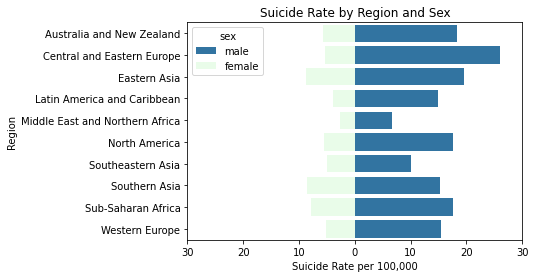

In [26]:
male = region_means['sex']=='male'

sns.barplot(x='means', y='Region', hue='sex', data=region_means[male])
fplot=sns.barplot(x='means', y='Region', hue='sex', data=region_means[-male],color="green")
fplot.set(xlim=(-30,30),xlabel="Suicide Rate per 100,000", ylabel = "Region")
fplot.set_xticklabels([abs(i) for i in range (-30,40,10)])
plt.title("Suicide Rate by Region and Sex")

#plt.savefig('gender_suicide.png',dpi=1200)

#### Question 3: How has suicide rate changed
* I know that I want to perform a full loop similar to what I did for the previous question, so the first step is to reset the index again, this time for the world_total subset (both male and female)
* Using a full loop to reveal the trend 
 * added a new column "trend" which stores the output
 * ran a full loop that performs the following function: if the suicide rate in 2016 is greater than that in 2010, it'll print "up" (an uptrend) in the "trend" column. If vice versa, it'll print "down" (a down trend). This action is performed for every country. 
* Finally, I used value_counts to see which trend is more prevalent

In [13]:
world_total = world_total.reset_index()

In [14]:
world_total['trend']= ''
for index, row in world_total.iterrows():
    if (row['2016'] > row['2010']):
        world_total.loc[index, 'trend'] = 'Up'
    else: 
        world_total.loc[index, 'trend'] = 'Down'
world_total['trend'].value_counts()

Down    128
Up       55
Name: trend, dtype: int64

In [15]:
world_total

,index,Country,Sex,2016,2010,2000,means,trend
0,405,Russia,Both sexes,26.5,34.5,47.5,36.166667,Down
1,288,Lithuania,Both sexes,25.7,31.3,46.3,34.433333,Down
2,42,Belarus,Both sexes,21.4,31.9,38.7,30.666667,Down
3,255,Kazakhstan,Both sexes,22.8,32.0,34.9,29.900000,Down
4,210,Guyana,Both sexes,30.2,29.3,26.7,28.733333,Up
...,...,...,...,...,...,...,...,...
178,30,Bahamas,Both sexes,1.6,1.9,2.2,1.900000,Down
179,264,Kuwait,Both sexes,2.2,1.5,1.6,1.766667,Up
180,198,Grenada,Both sexes,1.7,0.9,2.7,1.766667,Up
181,39,Barbados,Both sexes,0.4,1.6,2.1,1.366667,Down


#### Answer to Question 3
It seems that most countries (128 out of 183) are following a downtrend, meaning that suicide rates are lower than 16 years ago. For the countries that did show an uptrend, the numbers did not go up by much, suggesting that suicide rates in those countries are relatively stable over time. Russia, which still has the highest suicide rate, saw a drastic drop in suicide rate, from 47.5 in 2000 to 34.5 in 2010 and 26.5 in 2016. 

#### Visualize Q3
In order to visualize change over time I decided to create a stacked area plot. To do so I have to first clean the data by:
* grouping data by regions and replace values with regional means
* In this case I realized that there are more regions than I want so I further condensed it

In [16]:
change_region=world_total.merge(region_df).groupby('Region').mean()
change_region=change_region.drop(['means'], axis=1)
change_region=change_region.reset_index()
change_region

#further condense data by replaced region names first
change_region['Region']=change_region['Region'].replace(["Eastern Asia"],'Asia')
change_region['Region']=change_region['Region'].replace(["Southeastern Asia"],'Asia')
change_region['Region']=change_region['Region'].replace(["Southern Asia"],'Asia')
change_region['Region']=change_region['Region'].replace(["Central and Eastern Europe"],'Europe')
change_region['Region']=change_region['Region'].replace(["Western Europe"],'Europe')
change_region['Region']=change_region['Region'].replace(["Middle East and Northern Africa"],'Africa')
change_region['Region']=change_region['Region'].replace(["Sub-Saharan Africa"],'Africa')

#then do groupby again so that rows with the same value can be combined
change_region=change_region.groupby('Region').mean()
change_region

#changed the sequence of columns for plotting
change_region = change_region[['2000', '2010', '2016']]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


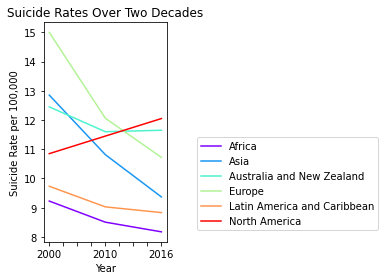

In [17]:
#flip columns and rows for plotting
flip_change=change_region.transpose()

flip_change.plot.line(colormap='rainbow',xlabel='Year', ylabel='Suicide Rate per 100,000').legend(bbox_to_anchor=(1.2, 0.5))
plt.title("Suicide Rates Over Two Decades")
plt.tight_layout()
#plt.savefig('suicide_change.png',dpi=1200)

#### Some more visualization
Created a heat map with suicide rates

In [18]:
geo['ADMIN']=geo['ADMIN'].replace(["United States of America"],'United States')
geo_merge = pd.merge(left=geo, right=world_total, left_on='ADMIN', right_on='Country')
geo_merge

,ADMIN,ISO_A3,geometry,index,Country,Sex,2016,2010,2000,means,trend
0,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",0,Afghanistan,Both sexes,6.4,7.4,8.1,7.300000,Down
1,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",9,Angola,Both sexes,8.9,10.4,13.9,11.066667,Down
2,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",3,Albania,Both sexes,5.6,7.7,5.8,6.366667,Down
3,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",513,United Arab Emirates,Both sexes,2.7,2.8,3.4,2.966667,Down
4,Argentina,ARG,"MULTIPOLYGON (((-68.65412 -54.88624, -68.65414...",15,Argentina,Both sexes,9.1,8.6,9.5,9.066667,Up
...,...,...,...,...,...,...,...,...,...,...,...
158,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",417,Samoa,Both sexes,5.4,6.4,10.7,7.500000,Down
159,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",540,Yemen,Both sexes,9.8,10.6,9.1,9.833333,Down
160,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",453,South Africa,Both sexes,12.8,13.9,14.4,13.700000,Down
161,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",543,Zambia,Both sexes,11.3,11.5,14.1,12.300000,Down


In [19]:
geo_merge = pd.merge(left=geo, right=world_total, left_on='ADMIN', right_on='Country')
geo_merge

,ADMIN,ISO_A3,geometry,index,Country,Sex,2016,2010,2000,means,trend
0,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",0,Afghanistan,Both sexes,6.4,7.4,8.1,7.300000,Down
1,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",9,Angola,Both sexes,8.9,10.4,13.9,11.066667,Down
2,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",3,Albania,Both sexes,5.6,7.7,5.8,6.366667,Down
3,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",513,United Arab Emirates,Both sexes,2.7,2.8,3.4,2.966667,Down
4,Argentina,ARG,"MULTIPOLYGON (((-68.65412 -54.88624, -68.65414...",15,Argentina,Both sexes,9.1,8.6,9.5,9.066667,Up
...,...,...,...,...,...,...,...,...,...,...,...
158,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",417,Samoa,Both sexes,5.4,6.4,10.7,7.500000,Down
159,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",540,Yemen,Both sexes,9.8,10.6,9.1,9.833333,Down
160,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",453,South Africa,Both sexes,12.8,13.9,14.4,13.700000,Down
161,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",543,Zambia,Both sexes,11.3,11.5,14.1,12.300000,Down


Text(0.5, 1.0, 'Suicide Rates Per 100,000 People ')

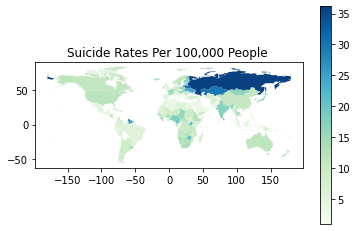

In [20]:
geo_merge.plot(column='means', legend=True,cmap='GnBu')
plt.title("Suicide Rates Per 100,000 People ")
#plt.savefig('world_suicide.png',dpi=1200)


#### Summary of observations and interpretation
Out of all countries Russia tops the chart of suicide rates while Antigua and Barbuda comes last. I suspect that the high rate in Russia may has to do with the political complication in the country, whereas low suicide rates are more common in countries where the Islamic faith dominates. I am not an expert on those topics, so it'd be interesting to look for datasets in relevant fields. In almost all countries, males are at significantly higher risk than females. This may suggest that a major driver of suicide is work, since men are historically more dominant in the labor force. Lastly, the data shows some optimism in that suicide rates have been decreasing in many countries. The next obvious question to ask is what is driving the differences between these countries. These observations definitely gave me a clearer idea about what I should look into next. 